### 5 Implement a Naive Bayes Classifier in Python and Scikit-learn to Categorize Text

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix

In [3]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train')
newsgroups_test = datasets.fetch_20newsgroups(subset='test')

In [5]:
print(newsgroups_train.keys())
print(newsgroups_train.data[:3])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])
["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n", "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nA

In [6]:
print(newsgroups_train.target[:3])
print(newsgroups_train.target_names)

[7 4 4]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [8]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [11]:
print(model.score(X_test, y_test))

0.77389803505


In [12]:
print(metrics.classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.52      0.63       319
          1       0.81      0.65      0.72       389
          2       0.82      0.65      0.73       394
          3       0.67      0.78      0.72       392
          4       0.86      0.77      0.81       385
          5       0.89      0.75      0.82       395
          6       0.93      0.69      0.80       390
          7       0.85      0.92      0.88       396
          8       0.94      0.93      0.93       398
          9       0.92      0.90      0.91       397
         10       0.89      0.97      0.93       399
         11       0.59      0.97      0.74       396
         12       0.84      0.60      0.70       393
         13       0.92      0.74      0.82       396
         14       0.84      0.89      0.87       394
         15       0.44      0.98      0.61       398
         16       0.64      0.94      0.76       364
         17       0.93      0.91      0.92   

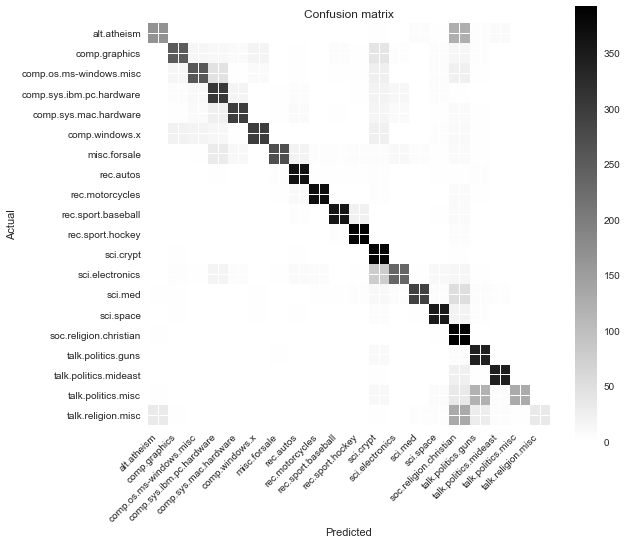

In [13]:
labels = list(newsgroups_train.target_names)
cm = ConfusionMatrix(y_test, predictions, labels)
cm.plot()
plt.show()